In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from create_plots import import_dataframe, show_stats, show_plots, quality_stats

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

Select the dataset name to evaluate:

In [2]:
result_files = [
    "A_10_1_results.csv",
    "A_20_2_results.csv",
    "A_30_3_results.csv",
    "A_norandom_40_1_results.csv",
    "A_norandom_40_2_results.csv",
    "A_norandom_40_3_results.csv",
    "A_norandom_40_4_results.csv"
]
#indices go from 0 to 6

filename = result_files[0]

In [3]:
print("This evaluation is for: " + filename)

This evaluation is for: A_20_2_results.csv


In [4]:
df = import_dataframe("result_files/"+filename)
filename = filename.split("_results.csv")[0]
print(df.columns)

Index(['name', 'n_taxa', 'n_trees', 'n_reticulations', 'msa_size',
       'sites_per_tree', 'sampling_type', 'simulation_type', 'celine_params',
       'brlen_scaler', 'seqgen_params', 'near_zero_branches_raxml',
       'n_equal_tree_pairs', 'true_network_weirdness', 'true_network_path',
       'fixed_reticulation_prob', 'runtime_raxml', 'inferred_network_path',
       'likelihood_type', 'brlen_linkage_type', 'start_type', 'timeout',
       'n_random_start_networks', 'n_parsimony_start_networks',
       'runtime_inference', 'use_partitioned_msa', 'n_reticulations_inferred',
       'bic_true', 'logl_true', 'bic_inferred', 'logl_inferred', 'bic_raxml',
       'logl_raxml', 'rf_absolute_raxml', 'rf_relative_raxml',
       'rf_absolute_inferred', 'rf_relative_inferred', 'msa_patterns',
       'unrooted_softwired_network_distance',
       'unrooted_hardwired_network_distance',
       'unrooted_displayed_trees_distance',
       'rooted_softwired_network_distance',
       'rooted_hardwired_ne

# Original Simulated Dataset Statistics 

Total number of datasets: 100


<Figure size 1200x800 with 0 Axes>

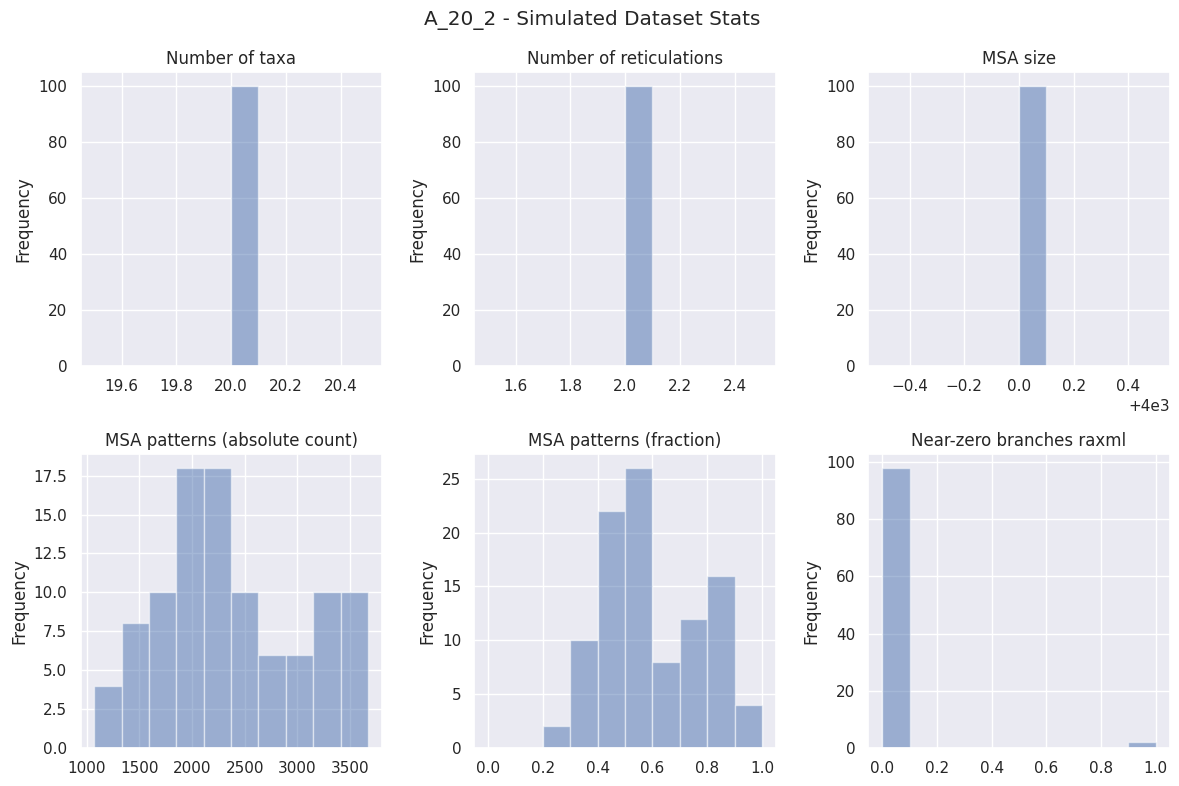

In [5]:
show_stats(filename, df.query('likelihood_type == "AVERAGE"'))

# Evaluation starting from raxml-ng best tree

+----------------------------------+------------------------+---------------------+
|         A_20_2_norandom          | LikelihoodType.AVERAGE | LikelihoodType.BEST |
+----------------------------------+------------------------+---------------------+
|   Inferred BIC better or equal   |       4 (8.00 %)       |     5 (10.00 %)     |
|   Inferred AIC better or equal   |       3 (6.00 %)       |      4 (8.00 %)     |
|  Inferred AICc better or equal   |       3 (6.00 %)       |      4 (8.00 %)     |
|        Inferred BIC worse        |      46 (92.00 %)      |     45 (90.00 %)    |
|        Inferred AIC worse        |      47 (94.00 %)      |     46 (92.00 %)    |
|       Inferred AICc worse        |      47 (94.00 %)      |     46 (92.00 %)    |
|  Inferred logl better or equal   |       3 (6.00 %)       |      4 (8.00 %)     |
|       Inferred logl worse        |      47 (94.00 %)      |     46 (92.00 %)    |
|  Inferred n_reticulations less   |       4 (8.00 %)       |      3 (6.00 %

<Figure size 1200x800 with 0 Axes>

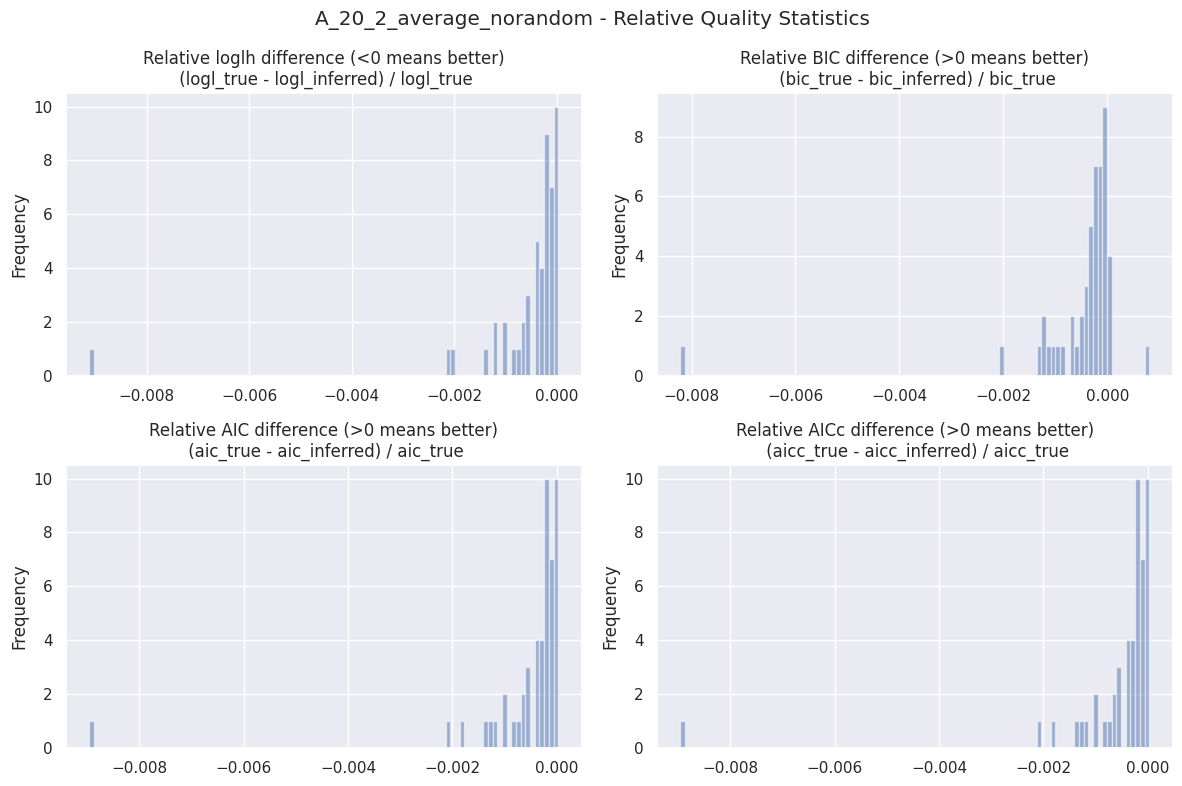

<Figure size 1200x800 with 0 Axes>

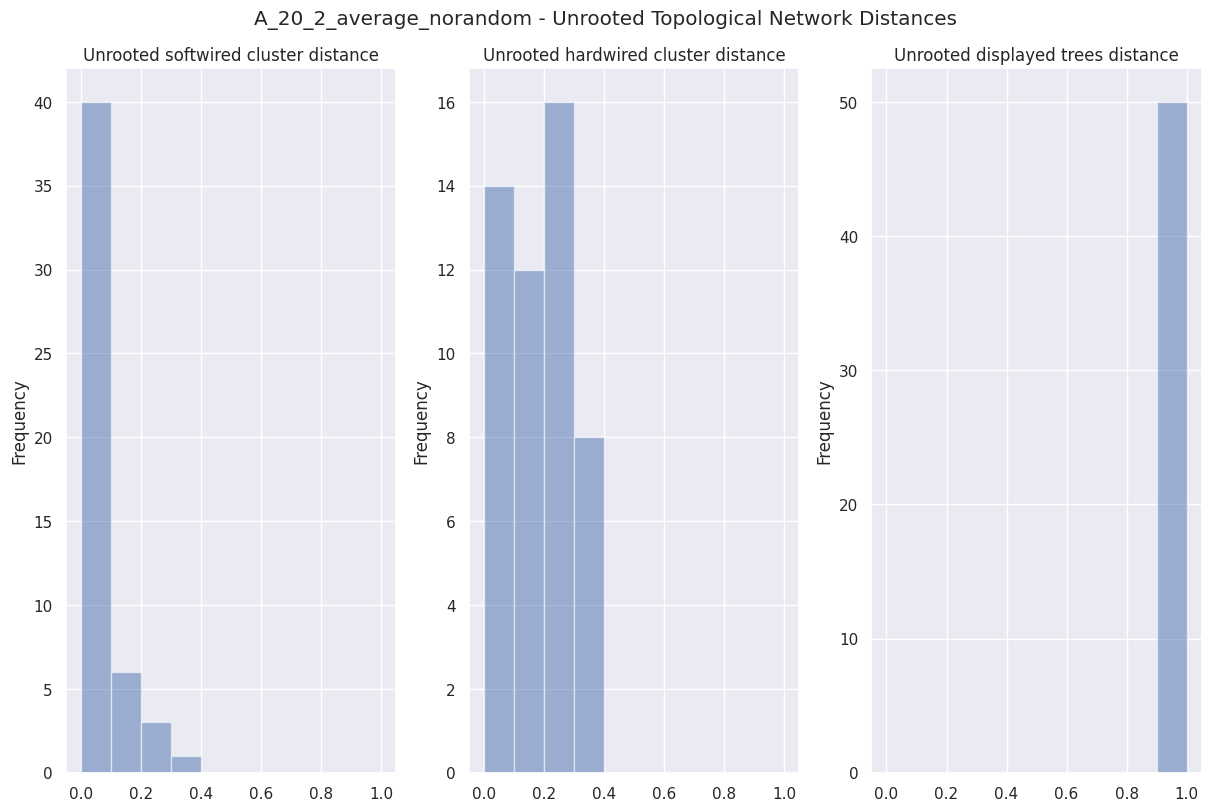

<Figure size 1200x800 with 0 Axes>

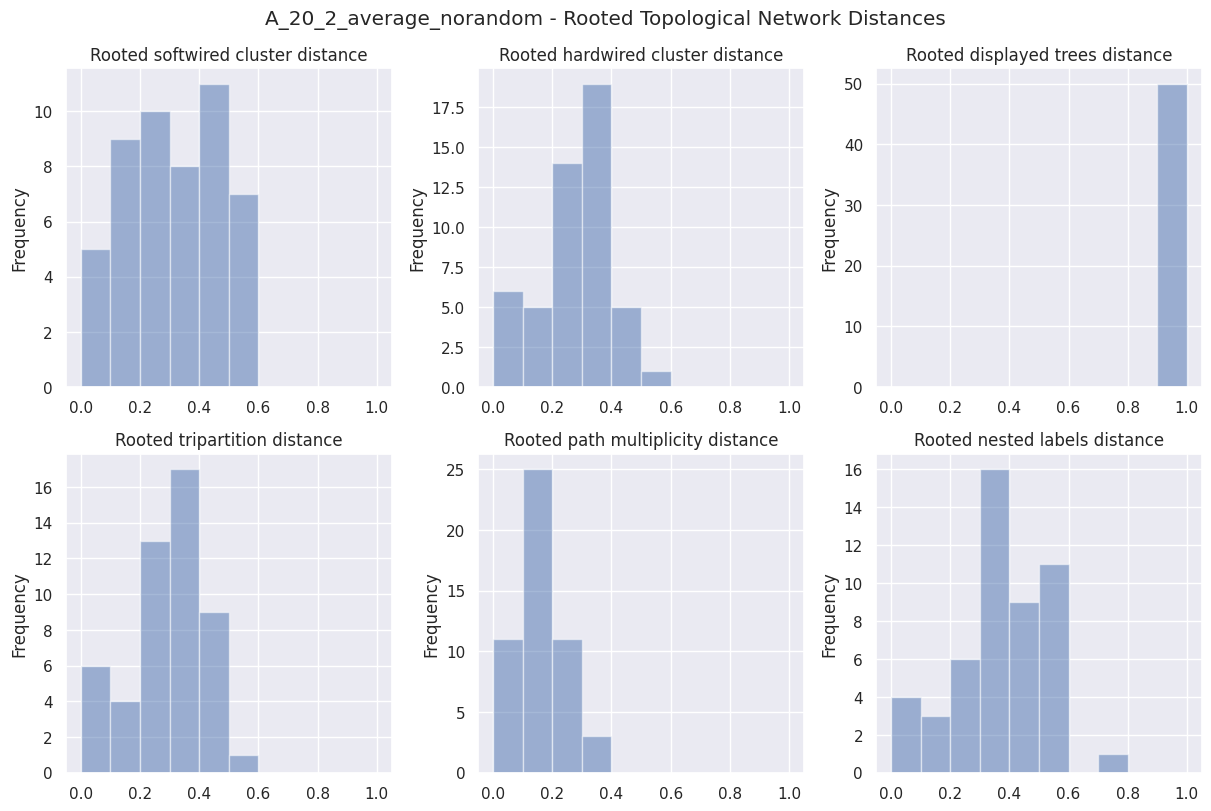

<Figure size 1200x800 with 0 Axes>

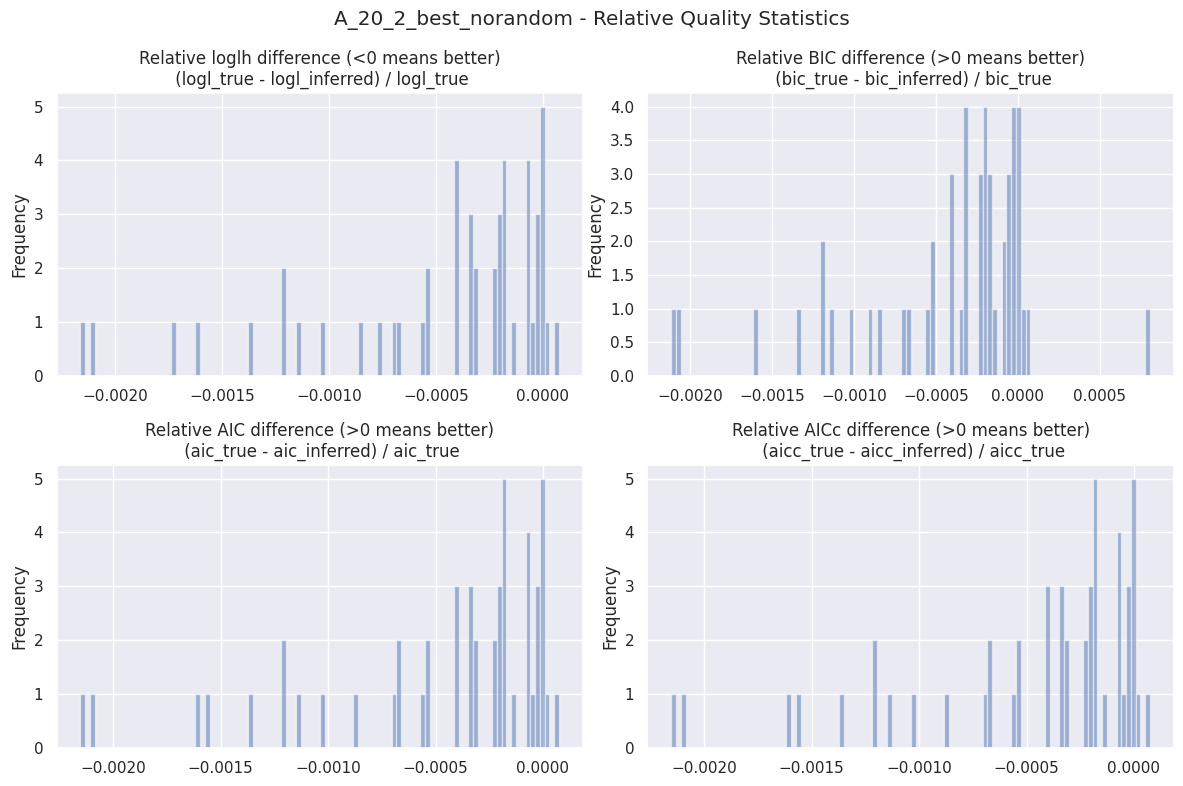

<Figure size 1200x800 with 0 Axes>

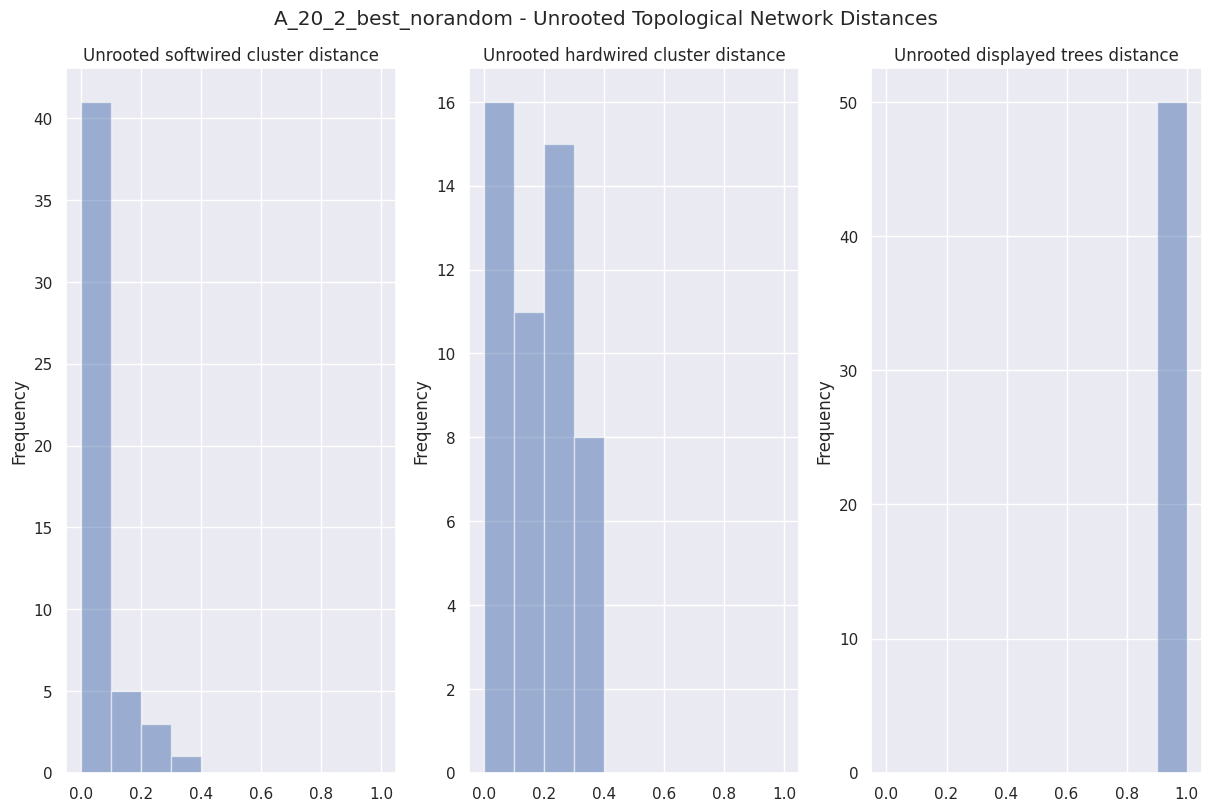

<Figure size 1200x800 with 0 Axes>

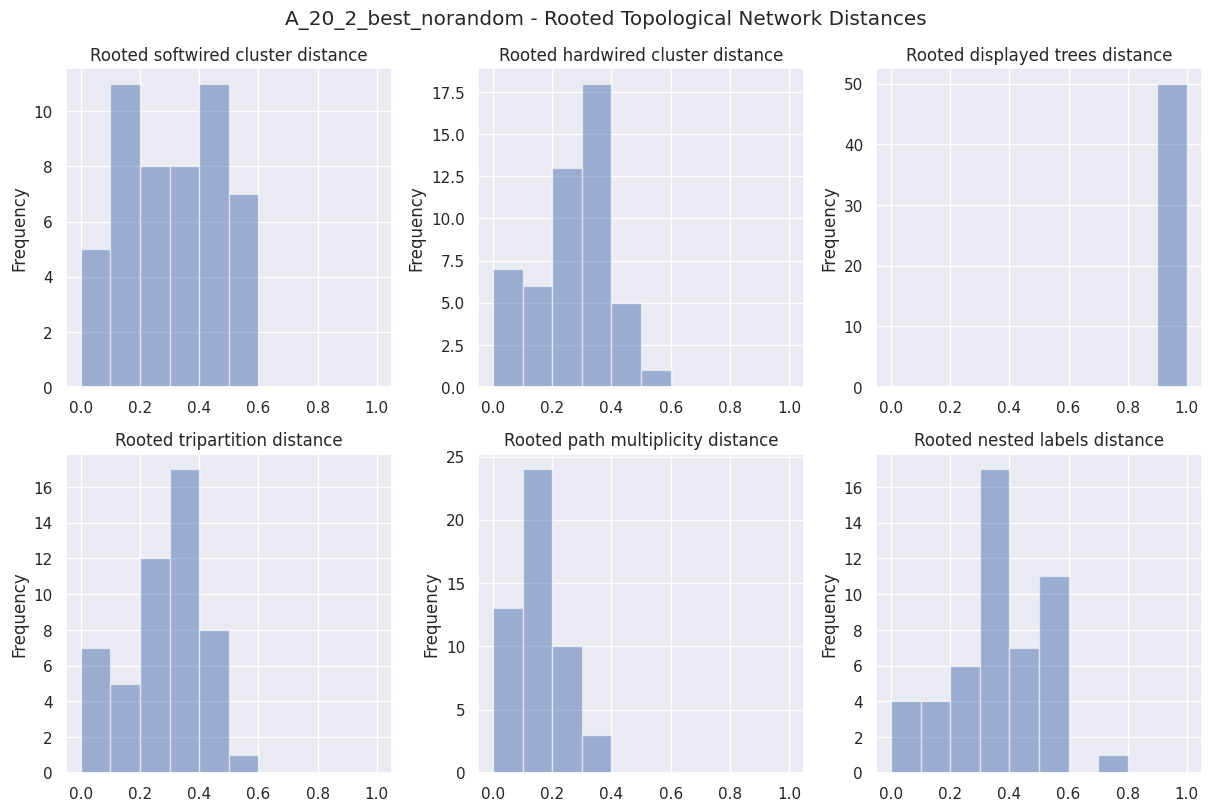

In [6]:
df_start_from_raxml = df.query('start_type == "FROM_RAXML"')
if len(df_start_from_raxml) > 0:
    quality_stats(filename+"_norandom", df_start_from_raxml)
    show_plots(filename+"_average_norandom", df_start_from_raxml.query('likelihood_type == "AVERAGE"'))
    show_plots(filename+"_best_norandom", df_start_from_raxml.query('likelihood_type == "BEST"'))
else:
    print("No data found for StartType.FROM_RAXML")

# Evaluation starting from 3 random + 3 parsimony trees

+----------------------------------+------------------------+---------------------+
|          A_20_2_random           | LikelihoodType.AVERAGE | LikelihoodType.BEST |
+----------------------------------+------------------------+---------------------+
|   Inferred BIC better or equal   |      13 (26.00 %)      |     14 (28.00 %)    |
|   Inferred AIC better or equal   |      12 (24.00 %)      |     13 (26.00 %)    |
|  Inferred AICc better or equal   |      12 (24.00 %)      |     13 (26.00 %)    |
|        Inferred BIC worse        |      37 (74.00 %)      |     36 (72.00 %)    |
|        Inferred AIC worse        |      38 (76.00 %)      |     37 (74.00 %)    |
|       Inferred AICc worse        |      38 (76.00 %)      |     37 (74.00 %)    |
|  Inferred logl better or equal   |      12 (24.00 %)      |     13 (26.00 %)    |
|       Inferred logl worse        |      38 (76.00 %)      |     37 (74.00 %)    |
|  Inferred n_reticulations less   |       3 (6.00 %)       |      3 (6.00 %

<Figure size 1200x800 with 0 Axes>

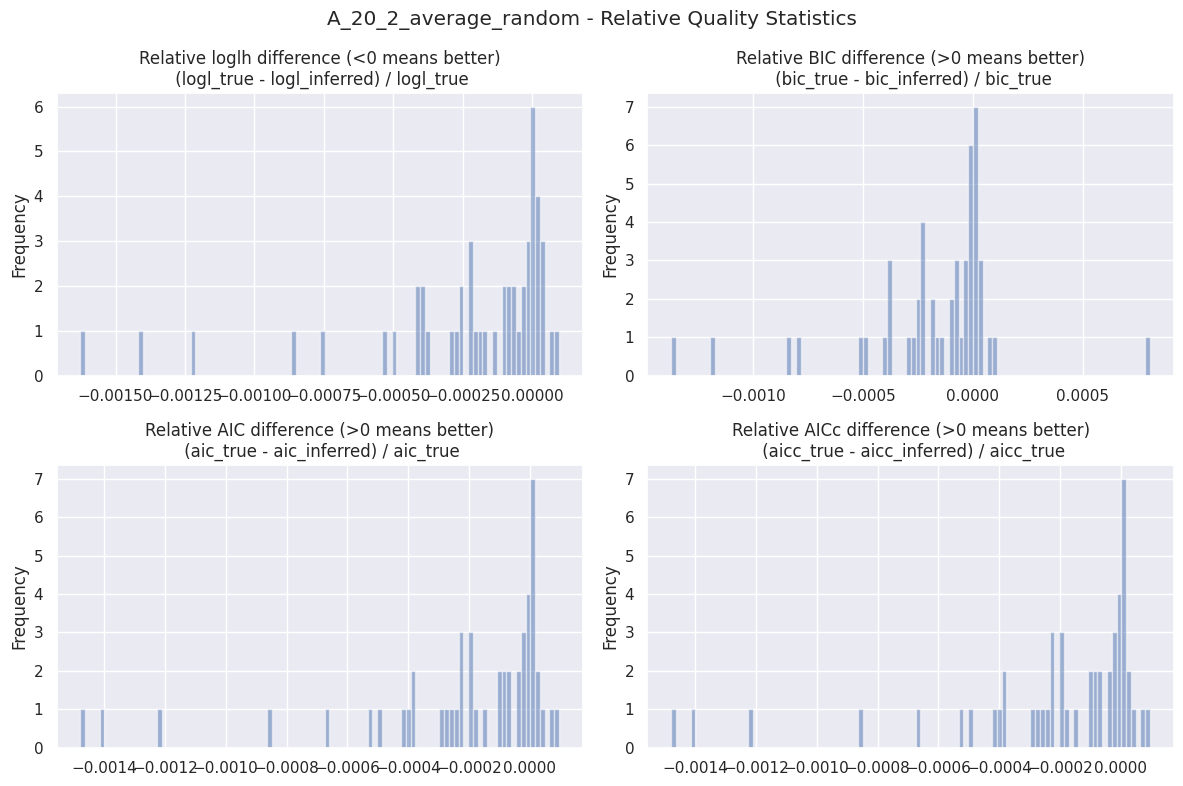

<Figure size 1200x800 with 0 Axes>

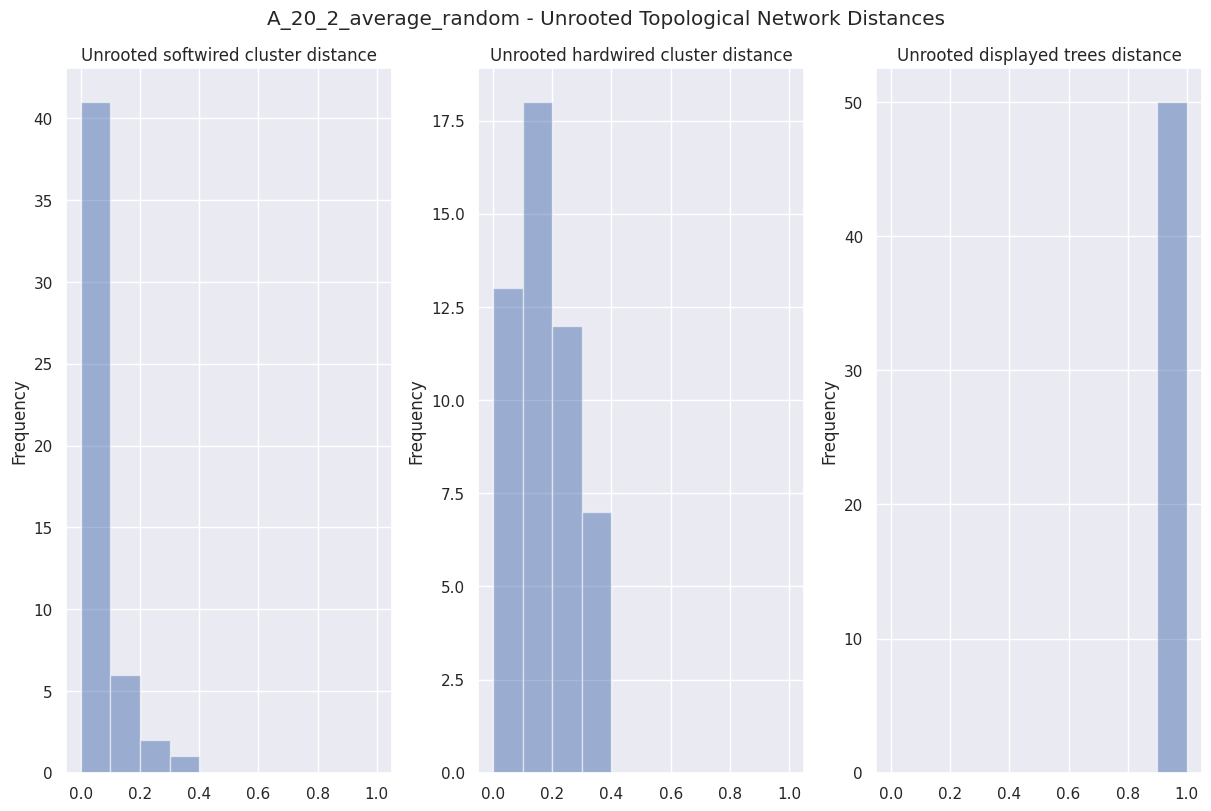

<Figure size 1200x800 with 0 Axes>

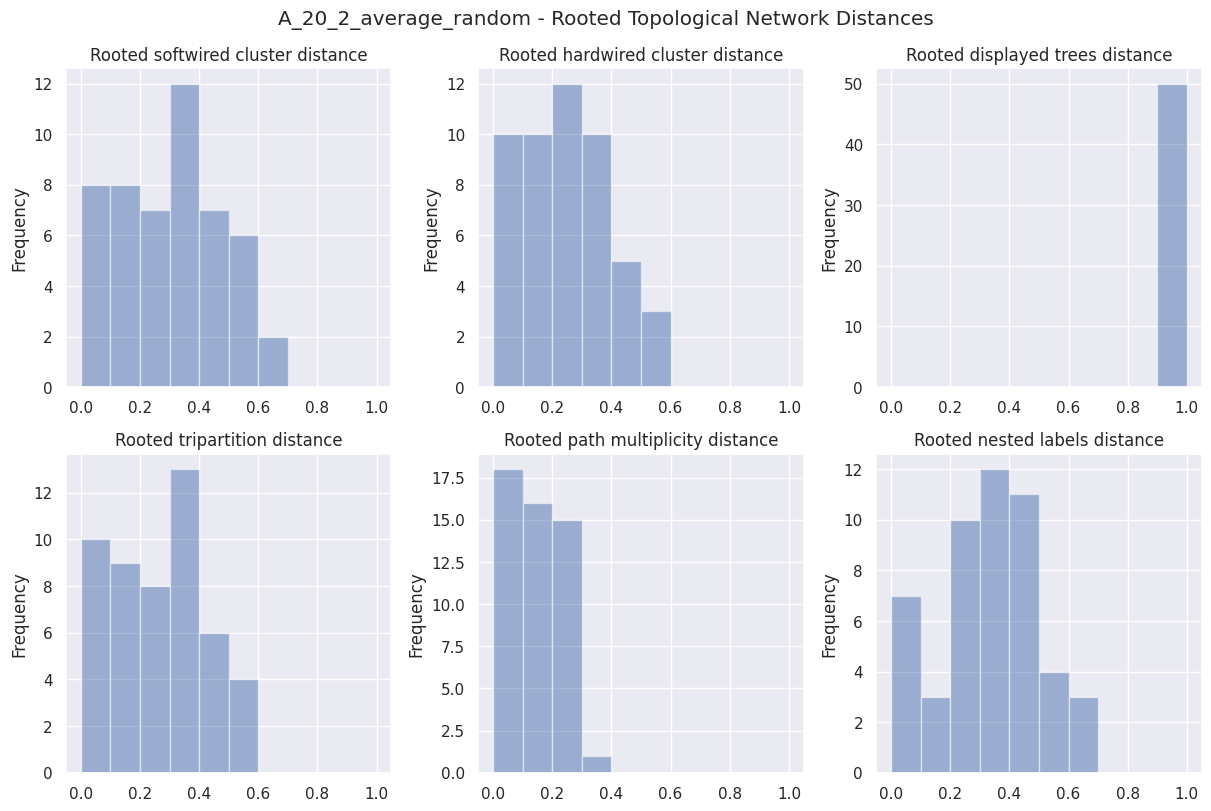

<Figure size 1200x800 with 0 Axes>

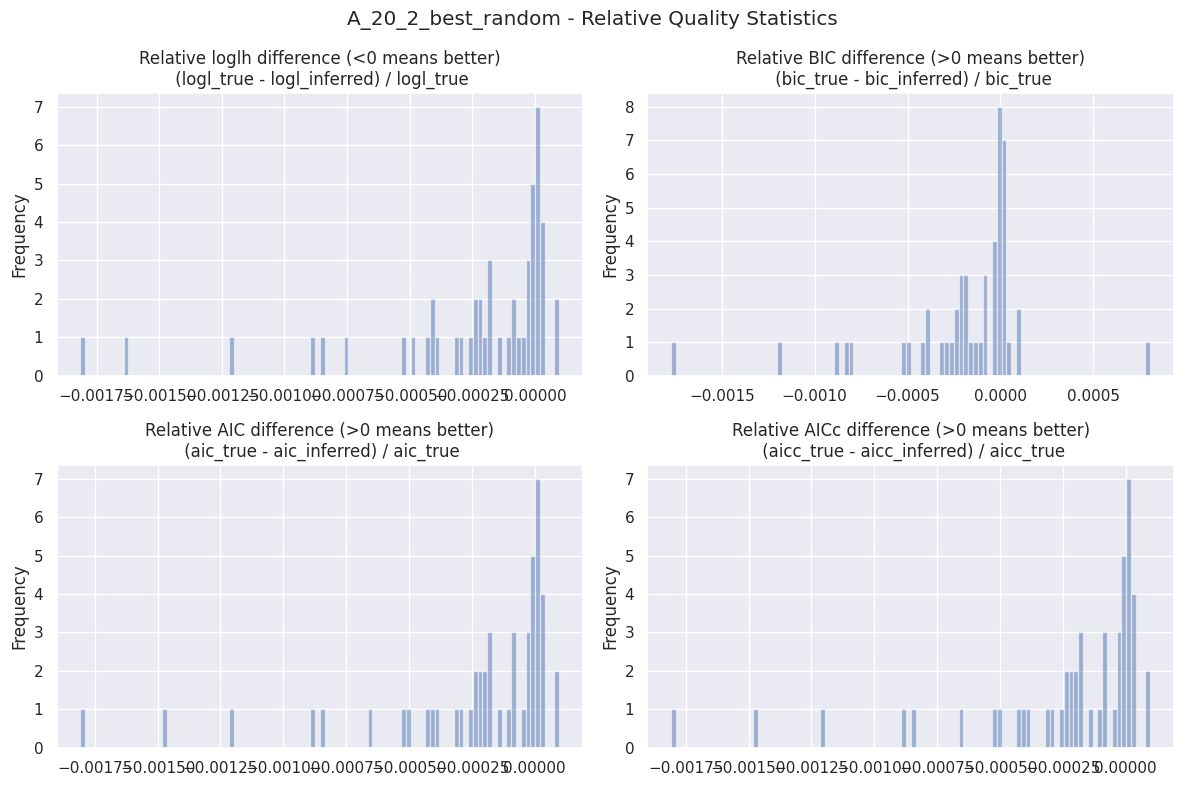

<Figure size 1200x800 with 0 Axes>

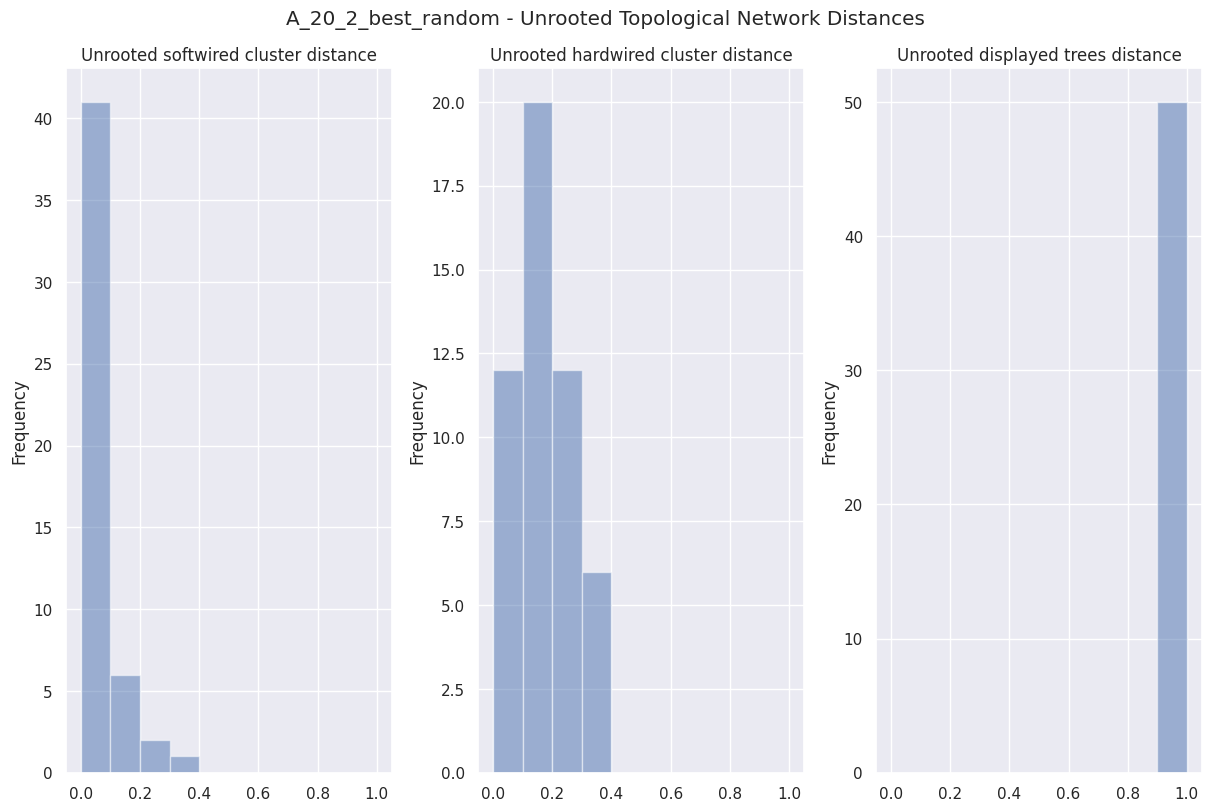

<Figure size 1200x800 with 0 Axes>

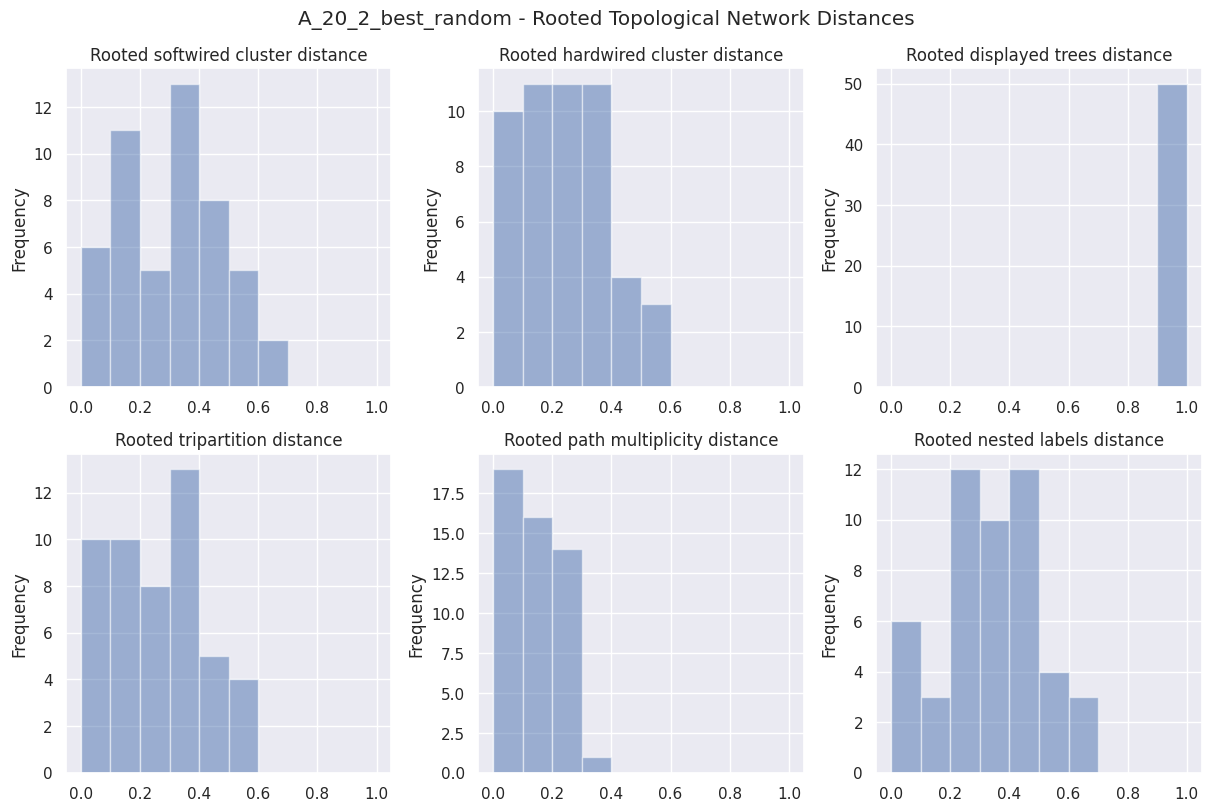

In [7]:
df_random = df.query('start_type == "RANDOM"')

if len(df_random) > 0:
    quality_stats(filename+"_random", df_random)
    show_plots(filename+"_average_random", df_random.query('likelihood_type == "AVERAGE"'))
    show_plots(filename+"_best_random", df_random.query('likelihood_type == "BEST"'))
else:
    print("No data found for StartType.RANDOM")